In [52]:
import numpy as np

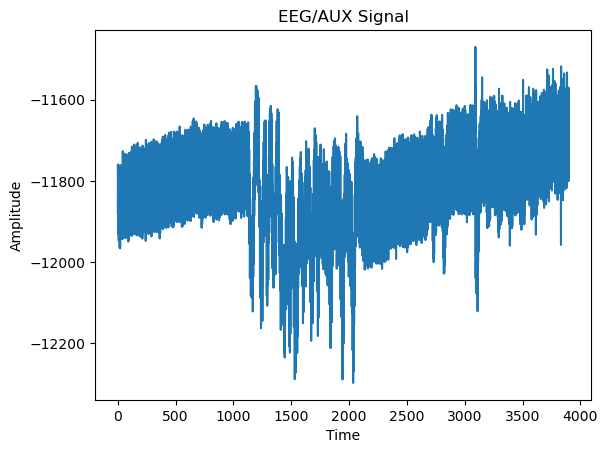

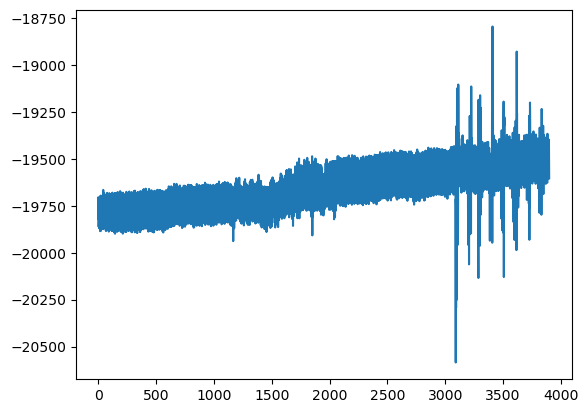

In [62]:
import matplotlib.pyplot as plt

# Plot the first channel
plt.plot(data[1][100:4000])  # Assuming data is (channels, samples)
plt.title("EEG/AUX Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()
plt.plot(data[2][100:4000])

In [56]:
data = np.load('/Users/kevinli/Documents/GitHub/cogs189/data/misc/aux_run-1.npy')

In [64]:
data.shape

(8, 4930)

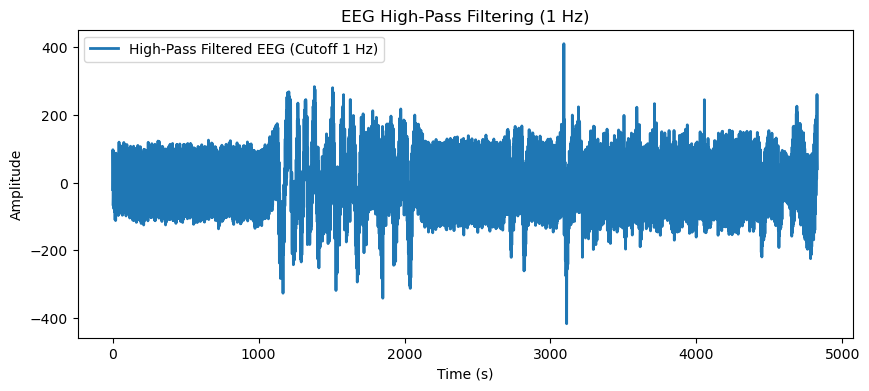

In [67]:
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

def highpass_filter(data, lowcut, fs, order=4):
    """
    Applies a high-pass Butterworth filter to EEG data.

    Parameters:
        data (array): EEG signal.
        lowcut (float): Cutoff frequency (Hz).
        fs (int): Sampling frequency (Hz).
        order (int): Order of the filter (higher = sharper).

    Returns:
        array: High-pass filtered EEG signal.
    """
    nyquist = 0.5 * fs
    low = lowcut / nyquist  # Normalize frequency
    b, a = butter(order, low, btype='highpass')
    return filtfilt(b, a, data)  # Zero-phase filtering

# Example Usage
fs = 250  # EEG sampling frequency in Hz
lowcut = 30  # Cutoff frequency (Hz)
time = np.arange(0, 4830)  # 5 seconds of data

filtered_eeg = highpass_filter(data[0][100:], lowcut, fs)

# Plot Original and Filtered Signal
plt.figure(figsize=(10, 4))
##plt.plot(time, data[0], label="Original EEG (with slow drift)", alpha=0.6)
plt.plot(time, filtered_eeg, label="High-Pass Filtered EEG (Cutoff 1 Hz)", linewidth=2)
plt.legend()
plt.title("EEG High-Pass Filtering (1 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
